In [2]:
import pandas as pd
import numpy as np
import Backtest as bs

In [3]:
df = pd.read_csv("dow_jones_30.csv")
df.Date = pd.to_datetime(df.Date)

In [4]:
df

,Date,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
0,2020-08-03,107.444427,231.064758,91.245544,162.270004,126.191895,203.190002,44.425030,76.151405,116.349998,...,73.008774,212.275833,96.446938,125.158379,108.559372,294.250214,187.955582,52.235020,37.385105,124.807449
1,2020-08-04,108.161949,227.543121,90.904137,165.070007,125.942932,201.410004,44.905453,77.659889,117.290001,...,72.239250,209.089844,95.466103,127.541634,107.325737,295.112823,189.532608,52.846432,37.248596,127.066162
2,2020-08-05,108.554001,225.562790,93.050163,174.279999,129.246628,202.639999,44.585171,78.297401,127.610001,...,72.212708,208.746719,99.006973,127.207977,109.204666,302.837097,193.287994,52.508789,37.139389,125.299728
3,2020-08-06,112.341370,225.637512,93.567169,172.199997,128.691208,207.789993,44.999657,78.539841,130.820007,...,71.690819,212.089569,98.526337,126.512093,107.933067,304.378052,195.919693,52.773426,37.212200,124.855728
4,2020-08-07,109.787216,224.834167,96.727692,170.020004,129.198746,201.050003,44.679375,77.938240,129.929993,...,71.664299,208.295792,99.909340,127.312843,111.368256,307.256470,193.544281,53.412220,37.785534,125.454178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,2022-08-25,170.029999,245.679993,162.229996,169.380005,198.880005,173.910004,47.270000,164.619995,117.459999,...,89.548088,278.850006,112.895729,145.699997,168.021881,539.876038,209.820007,43.740002,36.799999,135.869995
521,2022-08-26,163.619995,240.649994,157.309998,164.529999,191.919998,165.229996,45.889999,163.410004,114.070000,...,88.546173,268.089996,107.969872,142.289993,165.894012,527.594543,202.889999,43.250000,36.000000,131.600006
522,2022-08-29,161.380005,239.380005,154.539993,165.419998,191.779999,160.210007,45.709999,164.630005,113.529999,...,86.889519,265.230011,107.571014,141.690002,164.422409,528.112915,202.330002,43.330002,35.959999,132.880005
523,2022-08-30,158.910004,239.119995,154.660004,162.210007,186.940002,159.669998,45.240002,160.619995,112.430000,...,86.185196,262.970001,107.551079,140.179993,162.533188,521.204590,201.380005,42.529999,35.180000,132.479996


In [5]:
df_cleaned = df.resample('M', on='Date').first().dropna()

In [6]:
df_cleaned.isna().values.any()

False

In [8]:
df_cleaned.index # include only the month since we are re-balancing every month
# the data is the first day of each month, but the index is the last day of each month

DatetimeIndex(['2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
               '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [48]:
monthly_ret = (df_cleaned.iloc[:,1:].pct_change() + 1).dropna() # should use arithmetic return since we are doing the portfolio
monthly_ret = monthly_ret.iloc[11:,:] # ranging from 2021-8 to 2022-08

In [49]:
monthly_ret

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-31,1.060100,0.971203,1.013957,0.939974,0.951783,0.983182,1.044847,0.956878,0.990353,0.964095,...,0.976792,1.048674,1.068038,1.055696,0.981031,1.026378,1.019690,1.001713,0.961404,1.020815
2021-09-30,1.049605,0.938633,0.971466,0.967960,1.013648,1.114008,1.064743,0.954446,1.045172,1.032617,...,1.000000,1.061751,0.976779,1.013815,1.069352,1.004283,0.961021,0.985294,1.084459,1.042918
2021-10-31,0.935349,0.957779,1.057772,1.036127,0.934459,1.025865,0.933943,1.090064,0.959287,0.936680,...,1.078098,0.957824,0.893656,0.970384,0.962266,0.943590,1.001478,0.988351,0.930602,0.927392
2021-11-30,1.044234,0.980694,1.004042,0.949469,1.062698,1.099906,1.024283,1.097767,0.966934,0.980539,...,1.079115,1.139294,1.131035,1.028258,1.050453,1.157175,0.921895,0.986719,1.011111,1.092959
2021-12-31,1.107750,0.965184,0.861374,0.877016,0.932272,0.830691,0.980927,0.990095,0.835243,0.929824,...,0.847450,1.003989,1.002224,1.026360,0.908625,0.978485,0.896615,0.939943,0.932851,0.915548
2022-01-31,1.104631,1.128934,1.120952,1.104522,1.081109,1.015746,1.147738,1.063872,1.102779,1.077900,...,1.042441,1.014148,0.989598,1.112705,1.076760,1.134083,1.164440,1.053647,1.213632,1.059008
2022-02-28,0.959343,1.008778,1.093875,1.002309,0.996843,0.908635,0.881828,1.130220,0.921728,1.086865,...,1.065695,0.922360,0.900103,0.985896,1.078588,0.932567,1.049361,1.026716,0.937618,0.974144
2022-03-31,0.935845,0.993270,0.970143,0.935538,0.890334,0.899922,0.986455,1.122427,1.008374,0.935435,...,0.931885,0.957248,0.892052,0.959747,0.998988,1.016738,0.900800,1.007707,0.913847,0.965084
2022-04-30,1.068076,1.079526,1.051163,0.978708,1.202046,1.016085,1.019041,1.096848,0.940288,1.123403,...,1.103785,1.049059,1.012136,1.011610,1.109658,1.079490,1.083218,0.972207,0.974450,1.114744


In [16]:
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [58]:
weights = {}
for i in range(7, 12):
    weights[f'2021-{months[i]}'] = pd.read_pickle(f"hrp_weights_2021{months[i]}01.pickle")
for i in range(8):
    weights[f'2022-{months[i]}'] = pd.read_pickle(f"hrp_weights_2022{months[i]}01.pickle")

In [59]:
weights_matrix = pd.DataFrame(np.nan, index = weights.keys(), columns = monthly_ret.columns)

In [60]:
for key in weights.keys():
    weights_matrix.loc[key] = weights[key]

weights_matrix.index.name = 'Date'

In [64]:
weights_matrix

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2021-08,0.02019,0.02891,0.00778,0.00815,0.01325,0.01316,0.03262,0.00932,0.01328,0.00867,...,0.04843,0.02331,0.03755,0.07028,0.01638,0.04626,0.02693,0.12078,0.01897,0.07381
2021-09,0.01533,0.02664,0.00792,0.00596,0.01335,0.01703,0.03762,0.00926,0.01438,0.00911,...,0.04459,0.03632,0.04162,0.06702,0.02181,0.03734,0.02708,0.11484,0.02632,0.06093
2021-10,0.01765,0.03230,0.00749,0.00568,0.01031,0.03174,0.03872,0.00836,0.01459,0.00792,...,0.05109,0.02809,0.03297,0.06761,0.01952,0.05136,0.02960,0.09610,0.02443,0.06446
2021-11,0.02314,0.03203,0.00698,0.00825,0.00944,0.03112,0.04578,0.00784,0.01331,0.00692,...,0.03890,0.03328,0.03908,0.08602,0.01657,0.04466,0.02429,0.09344,0.01938,0.06682
2021-12,0.02726,0.03317,0.01194,0.01083,0.01422,0.02055,0.03917,0.01393,0.02063,0.01080,...,0.04417,0.03612,0.03531,0.05525,0.02928,0.04596,0.02514,0.07324,0.02970,0.06696
2022-01,0.02154,0.03122,0.01057,0.00999,0.01204,0.02312,0.04014,0.01378,0.01867,0.00943,...,0.04116,0.03064,0.03279,0.05420,0.02730,0.05076,0.01979,0.07259,0.02557,0.08137
2022-02,0.02653,0.03345,0.01080,0.00947,0.01101,0.01757,0.02977,0.01410,0.01853,0.00945,...,0.04525,0.02745,0.02745,0.07566,0.02159,0.04396,0.02219,0.08158,0.02158,0.07694
2022-03,0.01609,0.03351,0.01104,0.01061,0.01316,0.01267,0.03077,0.01862,0.02926,0.01148,...,0.05036,0.01914,0.02600,0.06836,0.02089,0.03978,0.02414,0.09187,0.02546,0.06911
2022-04,0.01965,0.03816,0.01001,0.00786,0.01981,0.01024,0.02994,0.02467,0.01822,0.01588,...,0.05111,0.02549,0.02846,0.04613,0.03467,0.02971,0.01826,0.08035,0.02413,0.06460


In [72]:
np.sum(weights_matrix.iloc[1,:])

1.00001

In [67]:
portfolio_return = {}

for i in range(13):
    portfolio_return[weights_matrix.index[i]] = np.dot(weights_matrix.iloc[i,:], monthly_ret.iloc[i,:])

In [68]:
portfolio_return

{'2021-08': 1.0157197450211504,
 '2021-09': 1.0116682182079586,
 '2021-10': 0.9727907684507356,
 '2021-11': 1.0404795858175326,
 '2021-12': 0.9575349578590552,
 '2022-01': 1.084694387841494,
 '2022-02': 0.9819983325872779,
 '2022-03': 0.9553342478452196,
 '2022-04': 1.0501480881576728,
 '2022-05': 0.9681597121320086,
 '2022-06': 1.011341912464621,
 '2022-07': 0.957305413506252,
 '2022-08': 1.0228786264138892}

In [87]:
DJIA = (pd.Series([34935.47, 35360.73, 33843.92, 35819.56, 34483.72, 36338.30, 35131.86, 33892.60,
                   34678.35, 32977.21, 32990.12, 30775.43, 32845.13, 31510.43, 29590.41]).pct_change() + 1).dropna()[:-1]

In [94]:
dow_Jones_return = dict(zip(portfolio_return.keys(), DJIA))


In [95]:
dow_Jones_return

{'2021-08': 1.012172728748175,
 '2021-09': 0.957104675158007,
 '2021-10': 1.0583750345704634,
 '2021-11': 0.9627064095706369,
 '2021-12': 1.0537813205767823,
 '2022-01': 0.9667997677381716,
 '2022-02': 0.9647254657168735,
 '2022-03': 1.0231835267875584,
 '2022-04': 0.9509451862617454,
 '2022-05': 1.0003914824813864,
 '2022-06': 0.9328680829290709,
 '2022-07': 1.067251700463649,
 '2022-08': 0.9593638387182515}

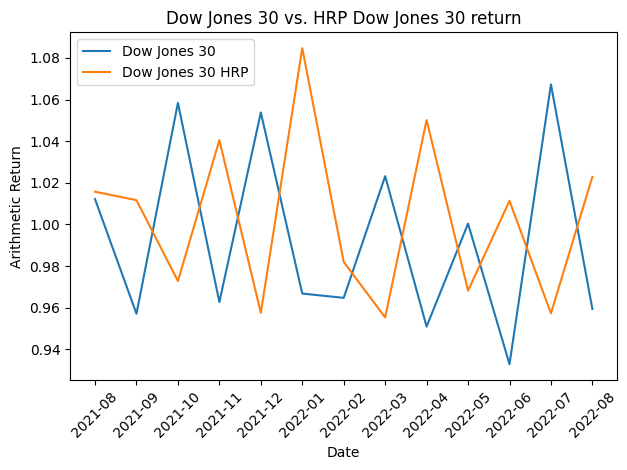

In [100]:
import matplotlib.pyplot as plt

plt.plot(dow_Jones_return.keys(), dow_Jones_return.values(), label = 'Dow Jones 30')
plt.plot(portfolio_return.keys(), portfolio_return.values(), label = 'Dow Jones 30 HRP')

plt.title("Dow Jones 30 vs. HRP Dow Jones 30 return")
plt.xlabel("Date")
plt.ylabel("Arithmetic Return")
plt.legend(loc="best")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.close() # if not include this, something weird bug may happen